# Baixando os dados e as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown https://drive.google.com/uc?id=1pKz0DLJpx3eQMClDBuSPDQspj135ohIR

Downloading...
From: https://drive.google.com/uc?id=1pKz0DLJpx3eQMClDBuSPDQspj135ohIR
To: /content/df_final.csv
100% 252k/252k [00:00<00:00, 5.12MB/s]


In [3]:
df = pd.read_csv('df_final.csv')
display(df)

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,preco,banheiros_tirar,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,1,Densidade Residencial Baixa,College Creek,2,5,2003,208500.000000,3,2.0,1,4.0,1710,8450
1,2,Densidade Residencial Baixa,Veenker,1,8,1976,181500.000000,3,2.0,1,3.0,1262,9600
2,3,Densidade Residencial Baixa,College Creek,2,5,2001,223500.000000,3,2.0,1,4.0,1786,11250
3,4,Densidade Residencial Baixa,Crawford,2,5,1915,140000.000000,3,3.0,1,2.0,1717,9550
4,5,Densidade Residencial Baixa,Northridge,2,5,2000,250000.000000,4,3.0,1,4.0,2198,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,Densidade Residencial Média,Meadow Village,2,7,1970,167081.220949,3,0.0,1,2.0,1092,1936
2915,2916,Densidade Residencial Média,Meadow Village,2,5,1970,164788.778231,3,1.0,1,2.0,1092,1894
2916,2917,Densidade Residencial Baixa,Mitchell,1,7,1960,219222.423400,4,2.0,1,2.0,1224,20000
2917,2918,Densidade Residencial Baixa,Mitchell,2,5,1992,184924.279659,3,0.0,1,2.0,970,10441


# Entendo e limpando os dados

## Tratamento de dados

In [4]:
df.drop(columns=['banheiros_tirar'], inplace=True)

In [5]:
nan_info = df.isna().any()
data_types_info = df.dtypes

In [6]:
print(nan_info)

Id                           False
tipo_moradia                  True
localizacao                  False
andares                      False
nota_casa                    False
ano_contrucao                False
preco                        False
vagas_garagem                 True
cozinhas                     False
banheiros                     True
tamanho(em pés quadrados)    False
tamanho lote                 False
dtype: bool


In [7]:
print(data_types_info)

Id                             int64
tipo_moradia                  object
localizacao                   object
andares                        int64
nota_casa                      int64
ano_contrucao                  int64
preco                        float64
vagas_garagem                float64
cozinhas                       int64
banheiros                    float64
tamanho(em pés quadrados)      int64
tamanho lote                   int64
dtype: object


In [8]:
linhas_com_nan = np.where(pd.isna(df['tipo_moradia']))[0]
linhas_com_nan2 = np.where(pd.isna(df['vagas_garagem']))[0]
linhas_com_nan3 = np.where(pd.isna(df['banheiros']))[0]

print(linhas_com_nan)
print(linhas_com_nan2)
print(linhas_com_nan3)

[1915 2216 2250 2904]
[2576]
[2120 2188]


In [9]:
indices_das_linhas = [1915, 2216, 2250, 2904, 2576, 2120, 2188]  # Substitua pelos índices das linhas que você quer imprimir

# Imprimir as linhas do DataFrame
for indice in indices_das_linhas:
    linha = df.iloc[indice]
    print("Linha", indice)
    print(linha)
    print()

Linha 1915
Id                                             1916
tipo_moradia                                    NaN
localizacao                  Iowa DOT and Rail Road
andares                                           1
nota_casa                                         4
ano_contrucao                                  1910
preco                                 173575.505287
vagas_garagem                                   1.0
cozinhas                                          1
banheiros                                       1.0
tamanho(em pés quadrados)                       810
tamanho lote                                  21780
Name: 1915, dtype: object

Linha 2216
Id                                             2217
tipo_moradia                                    NaN
localizacao                  Iowa DOT and Rail Road
andares                                           1
nota_casa                                         5
ano_contrucao                                  1952
preco          

In [10]:
# Definir os índices das linhas que você deseja alterar
indices_linhas = [1915, 2216, 2250, 2904]

# Nome da coluna em que você deseja substituir os valores NaN
nome_da_coluna = 'tipo_moradia'

# Valor que você deseja usar para substituir os NaN
valor_substituto = 'Densidade Residencial Baixa'

# Substituir os valores NaN pelo valor de substituição nas linhas especificadas
for indice in indices_linhas:
    df.at[indice, nome_da_coluna] = valor_substituto

In [11]:
# Índices das linhas e colunas com valores NaN a serem substituídos
indice_linha = 2576
nome_da_coluna = 'vagas_garagem'

# Valor que você deseja usar para substituir os NaN
valor_substituto = 2.0

# Substituir o valor NaN pelo valor de substituição
df.at[indice_linha, nome_da_coluna] = valor_substituto

In [12]:
# Definir os índices das linhas que você deseja alterar
indices_linhas = [2120, 2188]

# Nome da coluna em que você deseja substituir os valores NaN
nome_da_coluna = 'banheiros'

# Valor que você deseja usar para substituir os NaN
valor_substituto = 3

# Substituir os valores NaN pelo valor de substituição nas linhas especificadas
for indice in indices_linhas:
    df.at[indice, nome_da_coluna] = valor_substituto

In [13]:
indices_das_linhas = [1915, 2216, 2250, 2904, 2576, 2120, 2188]  # Substitua pelos índices das linhas que você quer imprimir

# Imprimir as linhas do DataFrame
for indice in indices_das_linhas:
    linha = df.iloc[indice]
    print("Linha", indice)
    print(linha)
    print()

Linha 1915
Id                                                  1916
tipo_moradia                 Densidade Residencial Baixa
localizacao                       Iowa DOT and Rail Road
andares                                                1
nota_casa                                              4
ano_contrucao                                       1910
preco                                      173575.505287
vagas_garagem                                        1.0
cozinhas                                               1
banheiros                                            1.0
tamanho(em pés quadrados)                            810
tamanho lote                                       21780
Name: 1915, dtype: object

Linha 2216
Id                                                  2217
tipo_moradia                 Densidade Residencial Baixa
localizacao                       Iowa DOT and Rail Road
andares                                                1
nota_casa                              

In [14]:
nan_info = df.isna().any()

print(nan_info)

Id                           False
tipo_moradia                 False
localizacao                  False
andares                      False
nota_casa                    False
ano_contrucao                False
preco                        False
vagas_garagem                False
cozinhas                     False
banheiros                    False
tamanho(em pés quadrados)    False
tamanho lote                 False
dtype: bool


## Transformação das variáveis

In [15]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(df.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [16]:
colunas_dados_transformados = df.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)], axis=1)
df_transformado.head()

,tipo_moradia,localizacao,Id,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,Densidade Residencial Baixa,College Creek,0.693147,1.098612,1.791759,7.602900,12.247699,1.098612,0.693147,1.609438,7.444833,9.042040
1,Densidade Residencial Baixa,Veenker,1.098612,0.693147,2.197225,7.589336,12.109016,1.098612,0.693147,1.386294,7.141245,9.169623
2,Densidade Residencial Baixa,College Creek,1.386294,1.098612,1.791759,7.601902,12.317171,1.098612,0.693147,1.609438,7.488294,9.328212
3,Densidade Residencial Baixa,Crawford,1.609438,1.098612,1.791759,7.557995,11.849405,1.386294,0.693147,1.098612,7.448916,9.164401
4,Densidade Residencial Baixa,Northridge,1.791759,1.098612,1.791759,7.601402,12.429220,1.386294,0.693147,1.609438,7.695758,9.565284


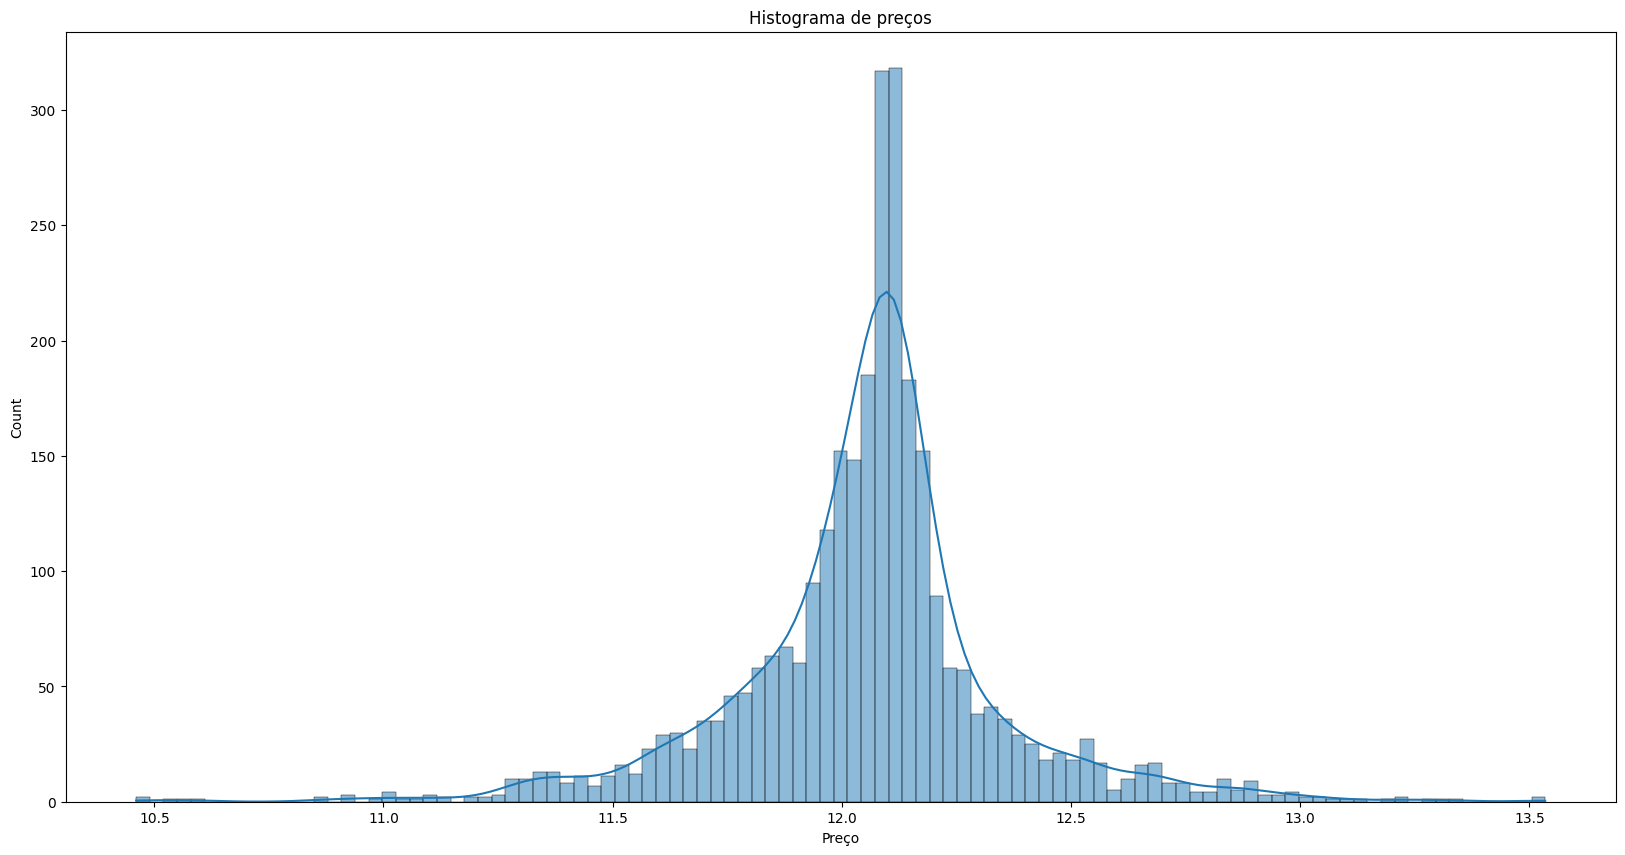

In [17]:
ax = sns.histplot(data=df_transformado, x='preco', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

## Dummies


In [18]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [19]:
variaveis_categoricas

Index(['tipo_moradia', 'localizacao'], dtype='object')

In [20]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,tipo_moradia_C (all),tipo_moradia_Densidade Residencial Alta,tipo_moradia_Densidade Residencial Baixa,tipo_moradia_Densidade Residencial Média,tipo_moradia_Área Residencial de Vilas Flutuantes,localizacao_Bloomington Heights,localizacao_Bluestem,localizacao_Briardale,localizacao_Brookside,localizacao_Clear Creek,...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
dados_imoveis_dummies.head()

,Id,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.693147,1.098612,1.791759,7.602900,12.247699,1.098612,0.693147,1.609438,7.444833,9.042040,...,False,False,False,False,False,False,False,False,False,False
1,1.098612,0.693147,2.197225,7.589336,12.109016,1.098612,0.693147,1.386294,7.141245,9.169623,...,False,False,False,False,False,False,False,False,False,True
2,1.386294,1.098612,1.791759,7.601902,12.317171,1.098612,0.693147,1.609438,7.488294,9.328212,...,False,False,False,False,False,False,False,False,False,False
3,1.609438,1.098612,1.791759,7.557995,11.849405,1.386294,0.693147,1.098612,7.448916,9.164401,...,False,False,False,False,False,False,False,False,False,False
4,1.791759,1.098612,1.791759,7.601402,12.429220,1.386294,0.693147,1.609438,7.695758,9.565284,...,False,False,False,False,False,False,False,False,False,False


# Divisão dos dados


In [22]:
#variáveis explanatórias (independentes)
X = dados_imoveis_dummies.drop('preco', axis=1)

#variável dependente
y = dados_imoveis_dummies['preco']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#divisão em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.metrics import r2_score

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [28]:
rf.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [29]:
previsao_rf = rf.predict(X_teste)

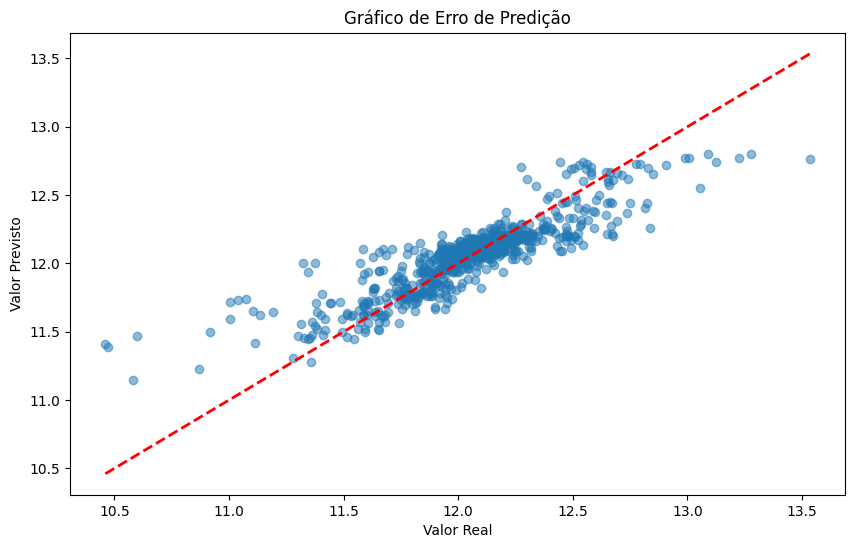

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, previsao_rf, alpha=0.5)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Gráfico de Erro de Predição')
plt.show()

In [31]:
#Métrica de desempenho

#coeficiente de determinacao
from sklearn.metrics import r2_score
r2_rf = r2_score(y_teste, previsao_rf)
r2_rf

0.7509913628987702


## Otimizando Random Forest

In [32]:
#divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#definindo o K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

In [33]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_treino,
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenhoRF_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.729


In [34]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [35]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [36]:
rf_randomcv = random_cv_rf.fit(X_treino, y_treino)

In [37]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.337703,0.293626,0.055087,0.010936,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.838910,0.824818,0.811941,0.820296,0.793029,0.817799,0.015159,3
1,3.179329,0.554202,0.042039,0.017552,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.838899,0.824827,0.811954,0.820325,0.793064,0.817814,0.015146,2
2,1.972601,0.216338,0.029460,0.003910,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.837643,0.822588,0.812341,0.823185,0.793611,0.817874,0.014564,1
3,2.230709,0.287559,0.029065,0.003559,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.836019,0.822935,0.809159,0.817895,0.791011,0.815404,0.014979,5
4,1.998977,0.273805,0.028484,0.009676,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.834957,0.821342,0.809407,0.821051,0.791173,0.815586,0.014645,4


In [38]:
rf_randomcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [39]:
rf_randomcv.best_score_

0.817873667734786

In [40]:
# RANDOM SEARCH TESTE

rf_otimizado = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [41]:
rf_otimizado.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [42]:
predicao_rf_otimizado = rf_otimizado.predict(X_teste)

In [43]:
r2_score(y_teste, predicao_rf_otimizado)

0.8271393970475646

In [44]:
import pickle

In [45]:
with open('rf_otimizado.pkl', 'wb') as arquivo:
    pickle.dump(rf_otimizado, arquivo)

# Catboost


In [46]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [47]:
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [48]:
cb = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=False)

In [49]:
cb.fit(X_treino, y_treino)

In [50]:
previsao_cb = cb.predict(X_teste)

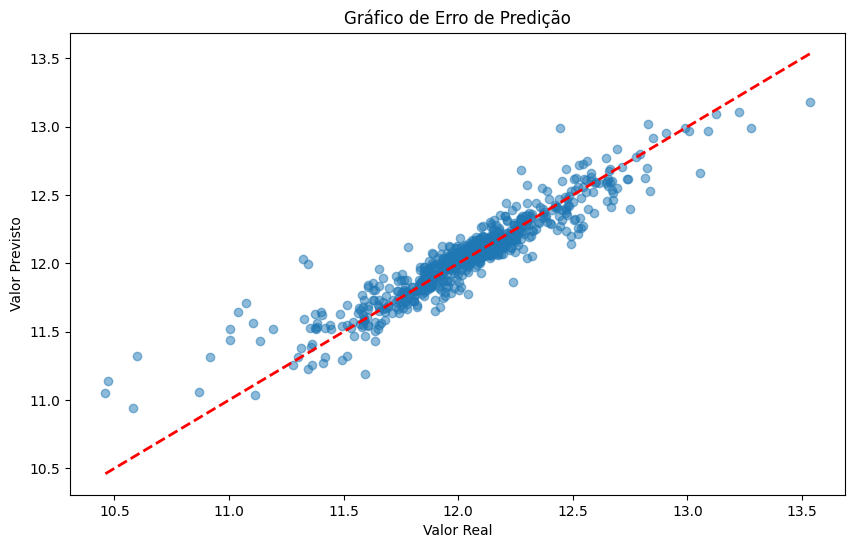

In [51]:
#Gráfico de erro de predição

plt.figure(figsize=(10, 6))
plt.scatter(y_teste, previsao_cb, alpha=0.5)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Gráfico de Erro de Predição')
plt.show()

In [52]:
#Métrica de desempenho
#coeficiente de determinacao

r2_cb = r2_score(y_teste, previsao_cb)
r2_cb

0.868307000358369

## Otimizando CatBoost

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
#CROSS VALIDATION
desempenho_cross_val_r2 = cross_val_score(estimator = cb,
                                       X = X_treino,
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.853


In [55]:
#RANDOM SEARCH NA VALIDAÇÃO (seleção de hiperparâmetros)
param_random_cb = {
    'depth': [4, 5, 6, 7, 8, 10],  # Varie a profundidade
    'iterations': [800, 820, 830, 840, 850, 860, 870, 900], # Varie o número de iterações
    'learning_rate': [0.03, 0.04, 0.05, 0.055, 0.06],  # Varie a taxa de aprendizado
}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
random_cv_cb = RandomizedSearchCV(
    cb,
    param_random_cb,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)


In [58]:
randomcv_cb = random_cv_cb.fit(X_treino, y_treino)

In [59]:
pd.DataFrame(randomcv_cb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_iterations,param_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.227076,0.314204,0.015891,0.005564,0.055,860,6,"{'learning_rate': 0.055, 'iterations': 860, 'd...",0.857576,0.839101,0.870111,0.845663,0.847320,0.851954,0.010840,2
1,9.384162,0.685614,0.019216,0.007069,0.030,830,8,"{'learning_rate': 0.03, 'iterations': 830, 'de...",0.858385,0.836268,0.874986,0.847646,0.850343,0.853526,0.012858,1
2,2.164252,0.183442,0.012744,0.003272,0.030,850,5,"{'learning_rate': 0.03, 'iterations': 850, 'de...",0.864237,0.840781,0.876477,0.832527,0.840417,0.850888,0.016625,3
3,1.609843,0.435743,0.041895,0.064850,0.030,850,4,"{'learning_rate': 0.03, 'iterations': 850, 'de...",0.860745,0.834891,0.865931,0.831679,0.830204,0.844690,0.015389,5
4,1.760760,0.692773,0.010508,0.006434,0.040,820,4,"{'learning_rate': 0.04, 'iterations': 820, 'de...",0.857352,0.835974,0.864497,0.831107,0.838909,0.845568,0.012982,4


In [60]:
#a melhor combinação
randomcv_cb.best_params_

{'learning_rate': 0.03, 'iterations': 830, 'depth': 8}

In [61]:
#o melhor score
randomcv_cb.best_score_

0.8535255540740245

In [62]:
#RANDOM SEARCH TESTE

cb_otimizado = CatBoostRegressor(
    loss_function='RMSE',
    depth=7,
    iterations=850,
    learning_rate=0.05,
    random_seed=42
)


In [63]:
cb_otimizado.fit(X_treino, y_treino)


0:	learn: 0.2697975	total: 2.48ms	remaining: 2.11s
1:	learn: 0.2618866	total: 4.6ms	remaining: 1.95s
2:	learn: 0.2541718	total: 6.67ms	remaining: 1.88s
3:	learn: 0.2477244	total: 8.6ms	remaining: 1.82s
4:	learn: 0.2408462	total: 10.8ms	remaining: 1.82s
5:	learn: 0.2349148	total: 12.8ms	remaining: 1.8s
6:	learn: 0.2290433	total: 14.8ms	remaining: 1.79s
7:	learn: 0.2229593	total: 16.9ms	remaining: 1.78s
8:	learn: 0.2173749	total: 18.9ms	remaining: 1.76s
9:	learn: 0.2121310	total: 21.1ms	remaining: 1.77s
10:	learn: 0.2070891	total: 23ms	remaining: 1.76s
11:	learn: 0.2021492	total: 25.1ms	remaining: 1.75s
12:	learn: 0.1977840	total: 27.1ms	remaining: 1.74s
13:	learn: 0.1934201	total: 29.1ms	remaining: 1.74s
14:	learn: 0.1894727	total: 31.1ms	remaining: 1.73s
15:	learn: 0.1858891	total: 33ms	remaining: 1.72s
16:	learn: 0.1822081	total: 34.9ms	remaining: 1.71s
17:	learn: 0.1782628	total: 37ms	remaining: 1.71s
18:	learn: 0.1751051	total: 39.1ms	remaining: 1.71s
19:	learn: 0.1718241	total: 41.

In [64]:
predicao_cb_otimizado = cb_otimizado.predict(X_teste)


In [65]:
r2_score(y_teste, predicao_cb_otimizado)


0.8696608666636172

In [66]:
cb_otimizado.save_model('cb_modelo.cbm')

# Teste (preço de acordo com o dataset do Kaggle: 175053.355553278

In [67]:
imovelteste = pd.DataFrame({
    'Id': [0],
    'tipo_moradia': ['Densidade Residencial Alta'],
    'localizacao': ['NAmes'],
    'andares': [1],
    'nota_casa': [5],
    'ano_contrucao': [1997],
    'vagas_garagem': [2],
    'cozinhas': [1],
    'banheiros': [3],
    'tamanho(em pés quadrados)': [1337],
    'tamanho lote': [10943],
})

In [68]:
imovelteste.head()

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,0,Densidade Residencial Alta,NAmes,1,5,1997,2,1,3,1337,10943


In [69]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados_teste = transformer.transform(imovelteste.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [70]:
colunas_dados_transformados_teste = imovelteste.select_dtypes(exclude=['object']).columns

df_transformado_teste = pd.concat([imovelteste.select_dtypes(include=['object']), pd.DataFrame(dados_transformados_teste, columns=colunas_dados_transformados_teste)], axis=1)
df_transformado_teste.head()

,tipo_moradia,localizacao,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,Densidade Residencial Alta,NAmes,0.0,0.693147,1.791759,7.599902,1.098612,0.693147,1.386294,7.198931,9.300547


In [71]:
variaveis_categoricas_prev_teste = df_transformado_teste.select_dtypes(include=['object']).columns

In [72]:
variaveis_categoricas_prev_teste

Index(['tipo_moradia', 'localizacao'], dtype='object')

In [73]:
prev_teste_dummies = pd.get_dummies(imovelteste[variaveis_categoricas_prev_teste])
prev_teste_dummies.head()

,tipo_moradia_Densidade Residencial Alta,localizacao_NAmes
0,True,True


In [74]:
prev_dummies_teste = pd.concat([df_transformado_teste.drop(variaveis_categoricas_prev_teste, axis=1), df_dummies], axis=1)
prev_dummies_teste.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,0.693147,1.791759,7.599902,1.098612,0.693147,1.386294,7.198931,9.300547,False,...,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
prev_dummies_teste = prev_dummies_teste.dropna()
prev_dummies_teste.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,0.693147,1.791759,7.599902,1.098612,0.693147,1.386294,7.198931,9.300547,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
dados_teste = prev_dummies_teste

# Predição (os valores das features foram escolhidos aleatoriamente)

In [77]:
imovelpred = pd.DataFrame({
    'Id': [0],
    'tipo_moradia': ['Densidade Residencial Média'],
    'localizacao': ['Veenker'],
    'andares': [2],
    'nota_casa': [8],
    'ano_contrucao': [1990],
    'vagas_garagem': [2],
    'cozinhas': [2],
    'banheiros': [5],
    'tamanho(em pés quadrados)': [450],
    'tamanho lote': [800],
})

In [78]:
imovelpred.head()

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,0,Densidade Residencial Média,Veenker,2,8,1990,2,2,5,450,800


In [79]:
from sklearn.preprocessing import FunctionTransformer

transformer_pred = FunctionTransformer(np.log1p, validate=True)
dados_transformados_pred = transformer_pred.transform(imovelpred.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [80]:
colunas_dados_transformados_pred = imovelpred.select_dtypes(exclude=['object']).columns

df_transformado_pred = pd.concat([imovelpred.select_dtypes(include=['object']), pd.DataFrame(dados_transformados_pred, columns=colunas_dados_transformados_pred)], axis=1)
df_transformado_pred.head()

,tipo_moradia,localizacao,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,Densidade Residencial Média,Veenker,0.0,1.098612,2.197225,7.596392,1.098612,1.098612,1.791759,6.111467,6.685861


In [81]:
variaveis_categoricas_pred = df_transformado_pred.select_dtypes(include=['object']).columns

In [82]:
variaveis_categoricas_pred

Index(['tipo_moradia', 'localizacao'], dtype='object')

In [83]:
prev_dummies_pred = pd.get_dummies(imovelpred[variaveis_categoricas_pred])
prev_dummies_pred.head()

,tipo_moradia_Densidade Residencial Média,localizacao_Veenker
0,True,True


In [84]:
prev_dummies_pred= pd.concat([df_transformado_pred.drop(variaveis_categoricas_pred, axis=1), df_dummies], axis=1)
prev_dummies_pred.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,1.098612,2.197225,7.596392,1.098612,1.098612,1.791759,6.111467,6.685861,False,...,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
prev_dummies_pred = prev_dummies_pred.dropna()
prev_dummies_pred.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,1.098612,2.197225,7.596392,1.098612,1.098612,1.791759,6.111467,6.685861,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
dados_pred = prev_dummies_pred

# Predição apresentação

In [87]:
# Carregando o modelo random forest otimizado
with open('rf_otimizado.pkl', 'rb') as arquivo:
    randomforest_otimizado = pickle.load(arquivo)

In [88]:
# Carregando o modelo catboost otimizado
catboost_otimizado = CatBoostRegressor()
catboost_otimizado.load_model('cb_modelo.cbm')

In [89]:
# Usando a linha de teste com random forest

previsao_rf_teste = randomforest_otimizado.predict(dados_teste)
previsao_rf_teste = np.expm1(previsao_rf_teste)
print("Previsão de preço na linha teste usando random forest:", previsao_rf_teste)

Previsão de preço na linha teste usando random forest: [187469.87253485]


In [90]:
# Usando a linha de teste com catboost

previsao_cb_teste = catboost_otimizado.predict(dados_teste)
previsao_cb_teste = np.expm1(previsao_cb_teste)
print("Previsão de preço na linha teste usando catboost:", previsao_cb_teste)

Previsão de preço na linha teste usando catboost: [189279.66397883]


In [91]:
# Usando a linha que desejamos descobrir com random forest

previsao_rf_pred = previsao_rf_teste = randomforest_otimizado.predict(dados_pred)
previsao_rf_pred = np.expm1(previsao_rf_pred)
print("Previsão de preço na linha que desejamos descobrir usando random forest:", previsao_rf_pred)

Previsão de preço na linha que desejamos descobrir usando random forest: [132467.69323593]


In [92]:
# Usando a linha que desejamos descobrir com catboost

previsao_cb_pred = catboost_otimizado.predict(dados_pred)
previsao_cb_pred = np.expm1(previsao_cb_pred)
print("Previsão de preço na linha que desejamos descobrir usando catboost:", previsao_cb_pred)

Previsão de preço na linha que desejamos descobrir usando catboost: [143094.67024548]
